In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving com to com (2)


In [ ]:
import io
com=pd.read_csv(io.BytesIO(uploaded['com']))

In [ ]:
com

,Unnamed: 0,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0.30,0.06,0.46,0.41,0.49,0.50,0.27,0.00,0.16,0.36,0.52,0.01,0.16,0.08,0.11,0.65,0.12,0.71,...,0.39,0.41,0.41,0.50,0.48,0.39,0.00,0.00,0.22,0.28,0.34,0.48,0.39,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,0.06,1.0,0.28,0.76,0.10,0.30,0.26,0.37,0.48,0.24,0.18,0.20,0.26,0.18,0.20,0.23,0.26,0.04,0.32,0.33,0.37,0.22,0.24,0.77,...,0.54,0.61,0.54,0.69,0.67,0.31,0.01,0.00,0.53,0.25,0.17,0.10,0.00,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,0.17,1.0,0.31,0.47,0.17,0.45,0.58,0.48,0.57,0.35,0.31,0.34,0.25,0.19,0.28,0.22,0.28,0

In [ ]:
len(com['communityname'].unique()), len (com['community'].unique()), len(com['county'].unique()), len(com['state'].unique())

(1828, 800, 109, 46)

In [ ]:
com.isnull().sum()
#com['LemasTotReqPerPop'].isnull().sum()

Unnamed: 0             0
state                  0
county                 0
community              0
communityname          0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 129, dtype: int64

In [ ]:
com.dtypes
# some numerical features are considered objects, it maybe due to the ? in our data

Unnamed: 0               int64
state                    int64
county                  object
community               object
communityname           object
                        ...   
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
ViolentCrimesPerPop    float64
Length: 129, dtype: object

In [ ]:
# replcae the ? with nan 
com=com.replace('?',np.nan)

In [ ]:
# getting rid of non predictive variables
com=com.drop(['Unnamed: 0','state','county','community','communityname','fold'],axis=1)

In [ ]:
com.convert_dtypes().dtypes 

population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
                        ...   
LemasPctPolicOnPatr     string
LemasGangUnitDeploy     string
LemasPctOfficDrugUn    float64
PolicBudgPerPop         string
ViolentCrimesPerPop    float64
Length: 123, dtype: object

In [ ]:
for col in com.columns:
  prc=(100*com[col].isnull().sum())/1994
  if (prc>25):
    print(col,":",round(prc,2),"%")
    com=com.drop([col],axis=1)

LemasSwornFT : 84.0 %
LemasSwFTPerPop : 84.0 %
LemasSwFTFieldOps : 84.0 %
LemasSwFTFieldPerPop : 84.0 %
LemasTotalReq : 84.0 %
LemasTotReqPerPop : 84.0 %
PolicReqPerOffic : 84.0 %
PolicPerPop : 84.0 %
RacialMatchCommPol : 84.0 %
PctPolicWhite : 84.0 %
PctPolicBlack : 84.0 %
PctPolicHisp : 84.0 %
PctPolicAsian : 84.0 %
PctPolicMinor : 84.0 %
OfficAssgnDrugUnits : 84.0 %
NumKindsDrugsSeiz : 84.0 %
PolicAveOTWorked : 84.0 %
PolicCars : 84.0 %
PolicOperBudg : 84.0 %
LemasPctPolicOnPatr : 84.0 %
LemasGangUnitDeploy : 84.0 %
PolicBudgPerPop : 84.0 %


In [ ]:
#com.shape
com.dtypes

population             float64
householdsize          float64
racepctblack           float64
racePctWhite           float64
racePctAsian           float64
                        ...   
LandArea               float64
PopDens                float64
PctUsePubTrans         float64
LemasPctOfficDrugUn    float64
ViolentCrimesPerPop    float64
Length: 101, dtype: object

In [ ]:
print(com.columns[com.isnull().any()])

Index(['OtherPerCap'], dtype='object')


In [ ]:
com['OtherPerCap'] = pd.to_numeric(com['OtherPerCap'])

In [ ]:
com['OtherPerCap'].dtypes

dtype('float64')

In [ ]:
#com.OtherPerCap.dtypes!='float64'
p=0
for i in range(len(com.OtherPerCap)):
  if (isinstance(com.OtherPerCap[i], float)):
    print(com.OtherPerCap[i])
    p=p+1
(p==len(com.OtherPerCap))

0.36
0.22
0.28
0.36
0.51
0.48
0.24
0.18
0.29
0.17
0.34
0.35
0.17
0.13
0.28
0.33
0.2
1.0
0.72
0.0
0.24
0.28
0.17
0.19
0.18
0.3
0.28
0.2
0.0
0.38
0.0
0.29
0.14
0.26
0.64
0.25
0.37
0.16
0.15
0.76
0.4
0.35
0.0
0.26
0.42
0.23
0.22
0.18
0.31
0.0
0.34
0.24
0.28
0.22
0.0
0.19
0.33
0.32
0.5
0.25
0.66
0.17
0.29
0.21
0.23
0.7
0.23
0.34
0.27
0.11
0.55
0.24
0.13
0.95
0.24
0.21
0.26
0.17
0.2
0.35
0.25
0.21
0.21
0.03
0.13
0.0
0.15
0.45
0.3
0.27
0.26
0.33
0.0
0.27
0.35
0.29
0.17
0.08
0.35
0.26
0.24
0.42
0.28
0.18
0.16
0.08
0.23
0.29
0.28
0.2
0.35
0.08
0.55
0.43
0.21
0.62
0.19
0.16
0.28
0.36
0.32
0.43
0.02
0.0
0.28
0.41
0.31
0.31
0.19
0.0
nan
0.0
0.2
0.41
0.39
0.45
0.0
0.41
0.88
0.71
0.34
0.24
0.34
0.95
0.29
0.16
0.27
0.08
0.15
0.11
0.2
0.33
0.0
0.08
0.08
0.23
0.44
0.16
0.28
0.29
0.45
0.47
0.37
0.16
0.34
0.48
0.2
0.19
0.21
0.24
0.17
0.38
0.15
0.16
0.16
0.37
0.29
0.26
0.23
0.34
0.22
0.11
0.2
0.16
0.36
0.32
0.33
0.42
0.26
0.21
0.36
0.37
0.16
0.39
0.32
0.0
0.09
0.23
0.22
0.13
0.26
0.48
0.23
0.24
0.21
0.22

True

In [ ]:
moy=com['OtherPerCap'].mean()
com['OtherPerCap'] = com['OtherPerCap'].fillna(moy)

In [ ]:
com.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330,0.361675,0.363531,0.501073,0.396384,0.440597,0.391224,0.441339,0.461244,0.434453,...,0.150587,0.267608,0.251891,0.462101,0.494428,0.404097,0.562598,0.186264,0.495186,0.314694,0.076815,0.719549,0.548686,0.204529,0.433335,0.494178,0.264478,0.243059,0.264689,0.263490,0.268942,0.346379,0.372457,0.422964,0.384102,0.490125,0.449754,0.403816,0.029438,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,0.128256,0.444811,0.209362,0.182913,0.204108,0.178071,0.173619,0.222137,0.167564,0.198257,0.191109,0.186804,0.171593,0.164775,0.195411,0.190960,0.183081,0.127941,0.228474,0.213360,0.202508,0.209193,0.202171,0.174036,0.202386,0.175457,0.198922,0.186292,0.182460,0.175437,...,0.219716,0.196567,0.190709,0.169551,0.157924,0.189301,0.197087,0.209956,0.172508,0.255182,0.150465,0.194024,0.185204,0.217770,0.188986,0.232467,0.242847,0.206295,0.224425,0.231542,0.235252,0.219323,0.209278,0.248286,0.213404,0.169500,0.187274,0.192593,0.102607,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [ ]:
Y=com['ViolentCrimesPerPop']
X=com.drop(['ViolentCrimesPerPop'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
def aic_sse(X,Y,model):
  y_pred=model.predict(X)
  resid=Y-y_pred
  sse=sum(resid**2)
  Aic=2*len(X.columns)-2*np.log(sse)
  return(Aic,sse)

In [ ]:
def features_selection(X,Y,model):
  from sklearn.metrics import r2_score
  aic0=0
  arret=0    
  features=[]
  data=pd.DataFrame()
  while (arret==0):
    aics=[]
    names=[]
    for col in X.columns:
      data[col]=X[col]
      model.fit(data,Y)
      y_pred=model.predict(data)
      resid=Y-y_pred
      sse=sum(resid**2)
      Aic=2*(len(x.columns)+2)-2*np.log(sse)
      aics.append(Aic)
      names.append(col)
      data=data.drop([col],axis=1)
    index=np.argmin(aics)
    if (min(aics) <= aic0):
      aic0=min(aics)
      index=np.argmin(aics) 
      features.append(names[index]) 
      data[names[index]]=X[names[index]]   
      X=X.drop([names[index]],axis=1)
    else:
      arret=1
  return(features,aic0)
      

In [ ]:
def features_selection(X,Y,model):
  from sklearn.metrics import r2_score
  arret=0    
  features=[]
  r0=0
  data=pd.DataFrame()
  while (arret==0):
    scores=[]
    names=[]
    for col in X.columns:
      data[col]=X[col]
      model.fit(data,Y)
      y_pred=model.predict(data)
      score=r2_score(Y,y_pred)
      scores.append(score)
      names.append(col)
      data=data.drop([col],axis=1)
    index=np.argmax(scores)
    if (max(scores) > r0):
      r0=max(scores)
      index=np.argmax(scores) 
      features.append(names[index]) 
      data[names[index]]=X[names[index]]   
      X=X.drop([names[index]],axis=1)
    else:
      arret=1
  return(features)
      

In [ ]:
scores=[]

In [ ]:
from sklearn.metrics import r2_score
arret=0    
features=[]
r0=0
data=pd.DataFrame()
while (arret==0):
  for col in X.columns:
    data[col]=X[col]
    model.fit(data,Y)
    y_pred=model.predict(data)
    score=r2_score(Y,y_pred)
    scores.append(score)
    names.append(col)
    data=data.drop([col],axis=1)
  index=np.argmax(scores)
  if (max(scores) > r0):
    r0=max(scores)
    index=np.argmax(scores) 
    features.append(names[index]) 
    data[names[index]]=X[names[index]]   
    X=X.drop([names[index]],axis=1)
    scores=[]
    names=[]
  else:
    arret=1


ValueError: ignored

In [ ]:
scores

[]

In [ ]:
Y=com['ViolentCrimesPerPop']
X=com.drop(['ViolentCrimesPerPop'],axis=1)
features_selection(X,Y,model)

next thing

In [ ]:
from scipy.stats import skew 
features=[]
for col in com.columns:
  a=skew(com[col])
  if (a< -3 or a>3):
    print(col, a)
    features.append(col)

population 5.0601466884909785
numbUrban 4.836721790273354
NumUnderPov 5.176957378148888
NumIlleg 6.268279079646459
NumImmig 7.466408803936178
HousVacant 4.290318682636902
NumInShelters 6.734521496868464
NumStreet 7.014282615792996
LandArea 5.703357044108492


In [ ]:
features.remove('NumStreet')

In [ ]:
features

['population',
 'numbUrban',
 'NumUnderPov',
 'NumIlleg',
 'NumImmig',
 'HousVacant',
 'NumInShelters',
 'LandArea']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


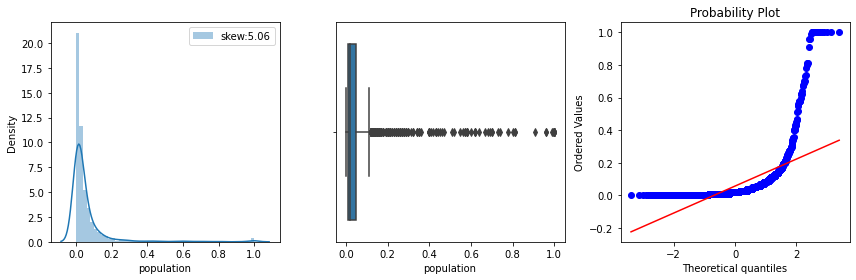

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


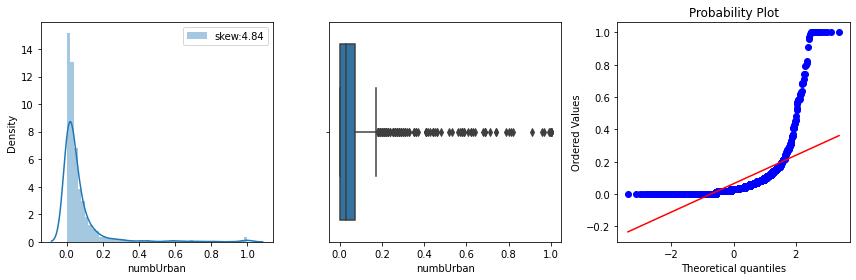

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


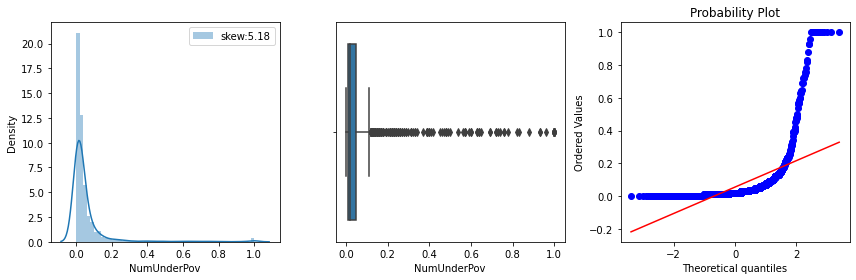

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


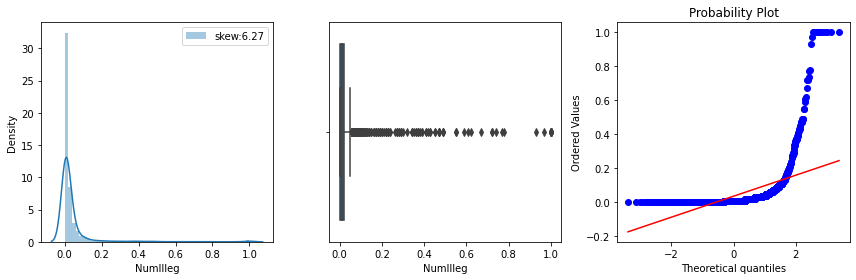

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


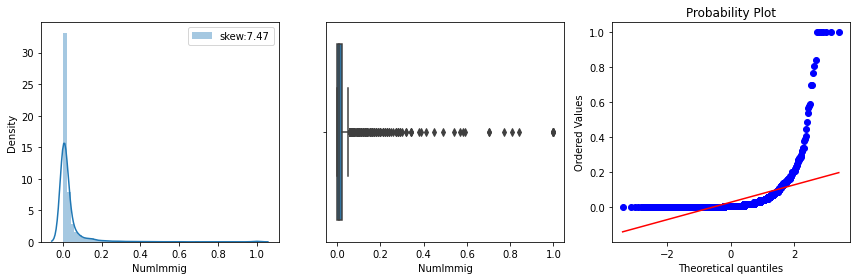

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


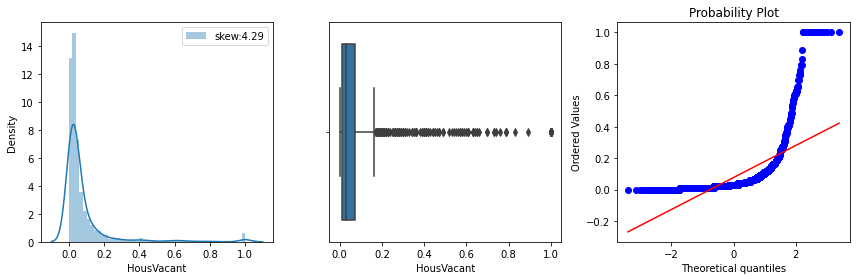

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


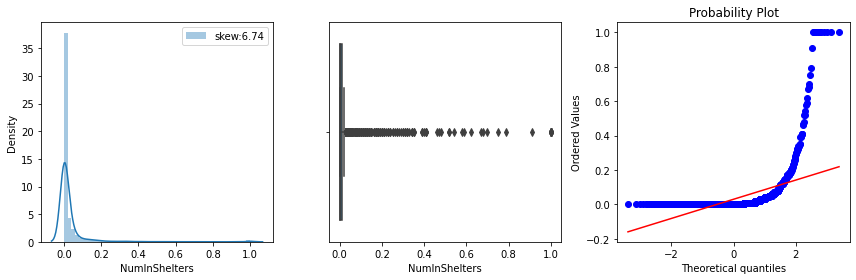

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


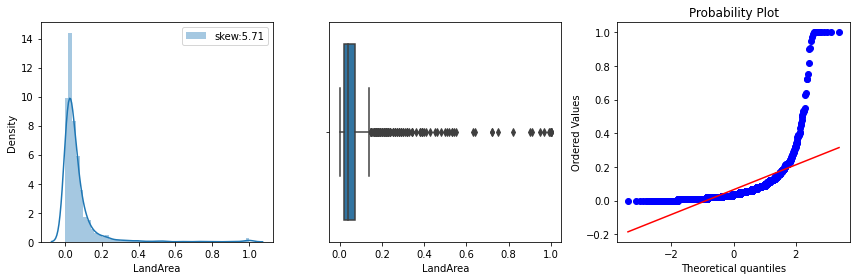

In [ ]:
from scipy import stats
import seaborn as sns
for col in features:
  plt.figure(figsize=(12,4))
  plt.subplot(131)
  sns.distplot(com[col],label="skew:"+str(np.round(com[col].skew(),2)))
  plt.legend()
  plt.subplot(132)
  sns.boxplot(com[col])
  plt.subplot(133)
  stats.probplot(com[col],plot=plt)
  plt.tight_layout()
  plt.show()

In [ ]:
def iqr_trimming(df, cols, factor):
    
    drop_outliers = np.array([])
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        s = df[col]
        
        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index
        
        drop_outliers = np.append(drop_outliers, indexes)
    
    return drop_outliers

In [ ]:
dropped=np.unique(iqr_trimming(com,features,1.5))

In [ ]:
df_iqr=com.copy()
df_iqr.drop(dropped,inplace=True)

In [ ]:
df_iqr

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,...,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.0,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,...,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.0,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,...,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.0,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.90,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,...,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.0,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,1.00,0.52,0.68,0.20,0.61,0.28,0.15,0.25,0.62,0.72,0.76,0.77,0.28,0.52,0.48,0.60,0.01,0.12,0.13,0.12,0.80,0.10,0.65,0.19,0.77,0.06,0.91,0.49,0.57,...,0.28,0.25,0.19,0.29,0.53,0.18,0.39,0.26,0.73,0.0,0.02,0.84,0.30,0.16,0.28,0.25,0.02,0.05,0.94,1.00,1.00,0.67,0.63,0.68,0.62,0.47,0.59,0.11,0.00,0.0,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,0.00,0.00,0.15,0.33,0.13,0.27,0.65,0.41,0.45,0.21,0.22,0.29,0.15,0.00,0.29,0.00,0.14,0.02,0.45,0.57,0.70,0.21,0.27,0.43,1.00,0.17,0.93,0.24,0.42,0.32,...,0.02,0.19,0.18,0.43,0.43,0.42,0.58,0.17,0.46,0.5,0.02,0.73,0.58,0.18,0.40,0.56,0.55,0.48,0.06,0.06,0.08,0.02,0.07,0.08,0.09,0.20,0.16,0.36,0.00,0.0,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
1986,0.05,0.52,0.02,0.97,0.04,0.02,0.40,0.43,0.29,0.39,0.05,0.88,0.58,0.68,0.36,0.69,0.49,0.11,0.55,0.57,0.51,0.49,0.47,0.40,0.40,0.34,0.80,0.01,0.06,0.27,0.35,0.34,0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

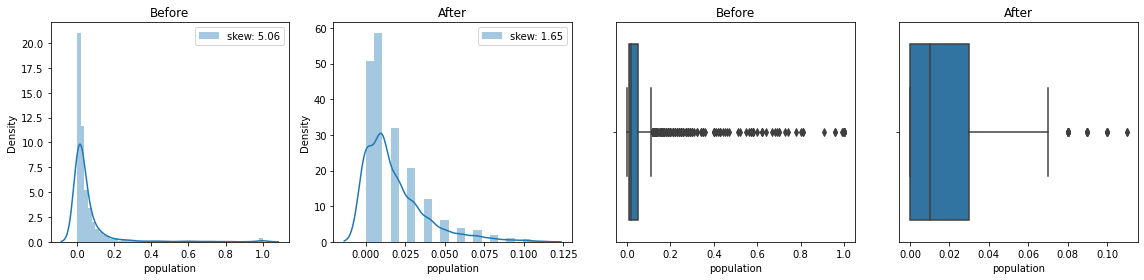

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

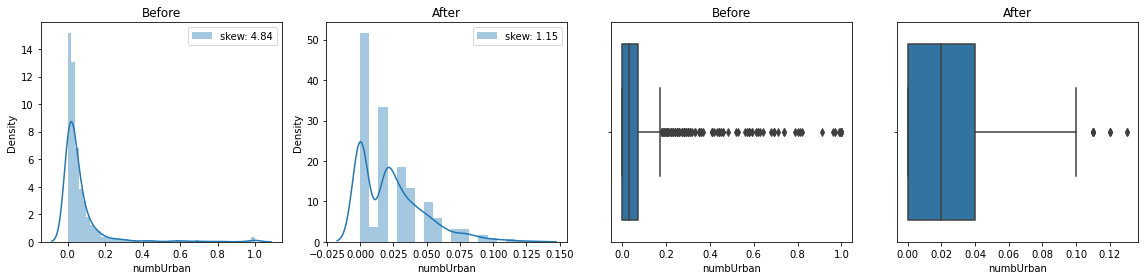

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

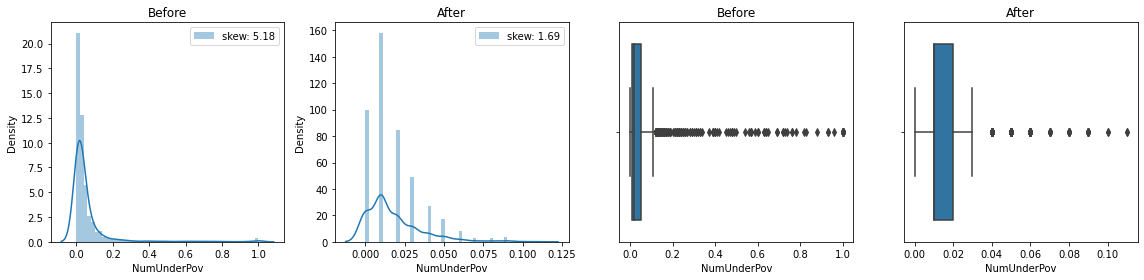

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

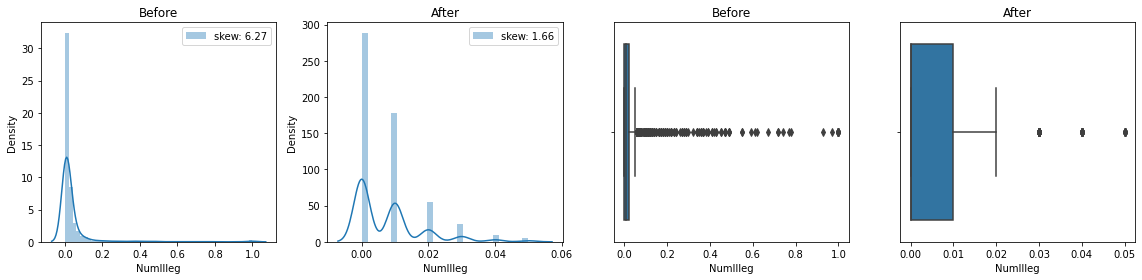

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

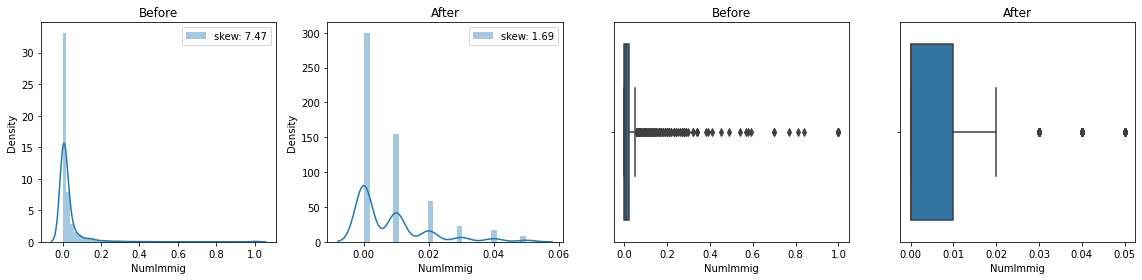

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

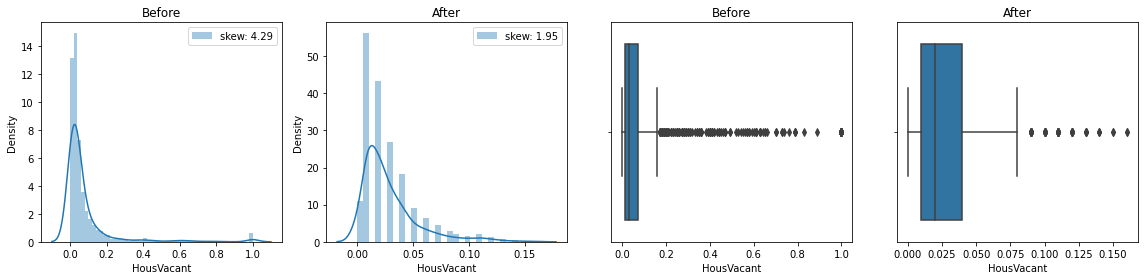

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

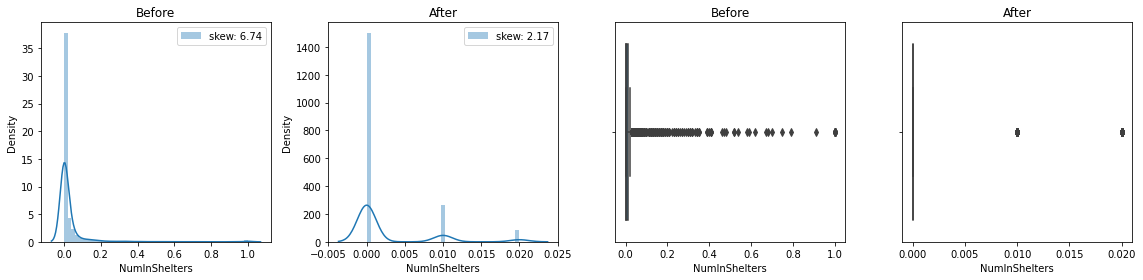

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

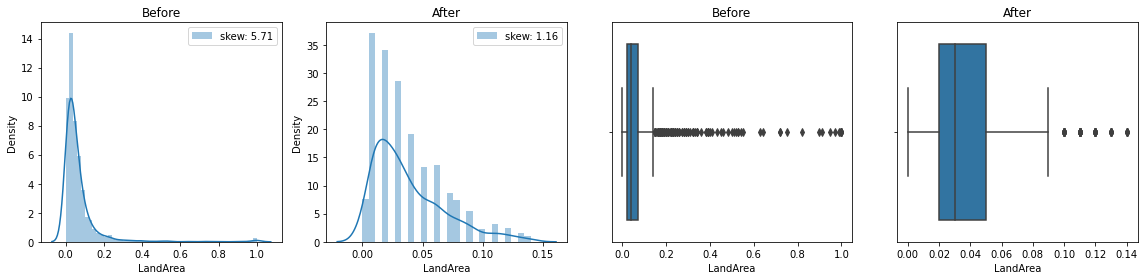

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(com[col], label="skew: " + str(np.round(com[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_iqr[col], label="skew: " + str(np.round(df_iqr[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(com[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_iqr[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [ ]:
df_cap=com.copy()

In [ ]:
iqr_capping(df_cap, features, 1.5)
iqr_capping

<function __main__.iqr_capping>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

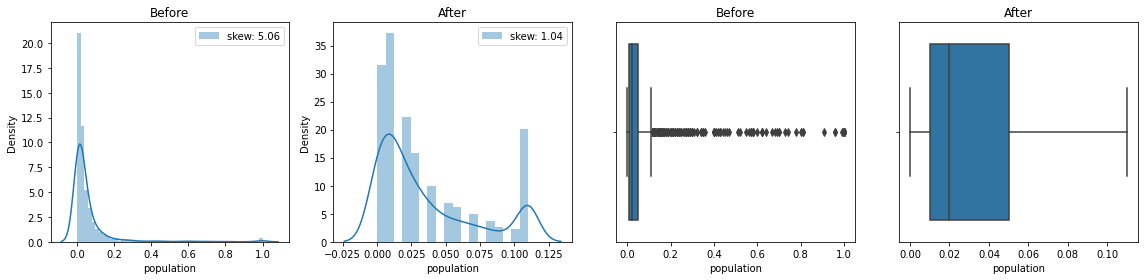

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

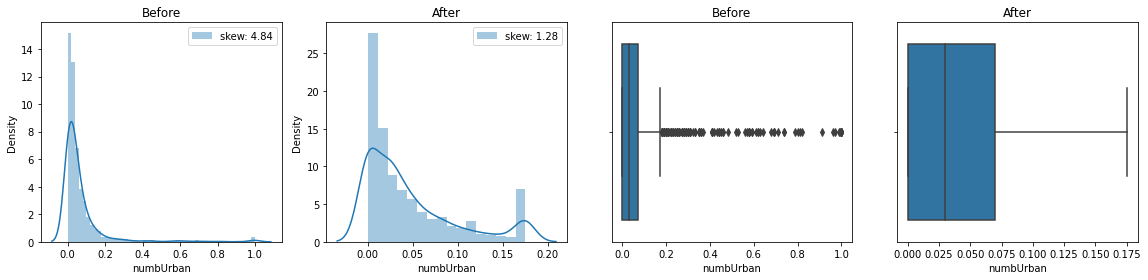

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

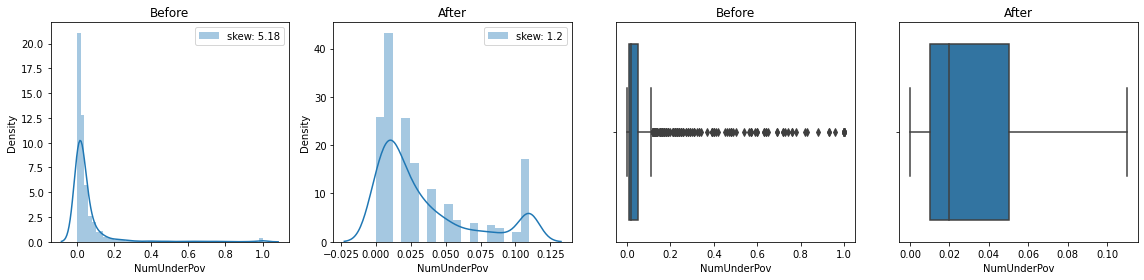

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

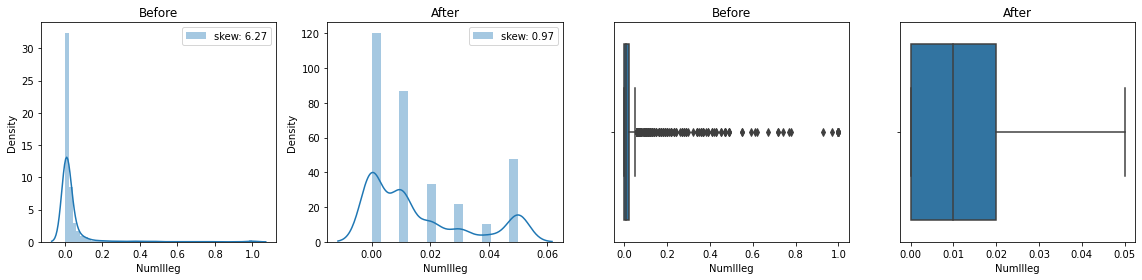

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

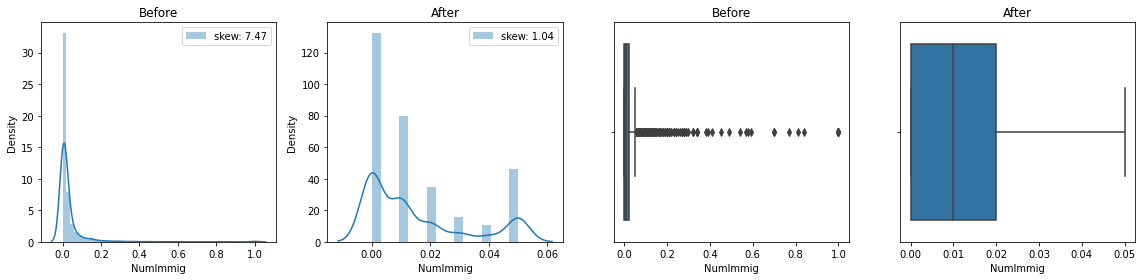

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

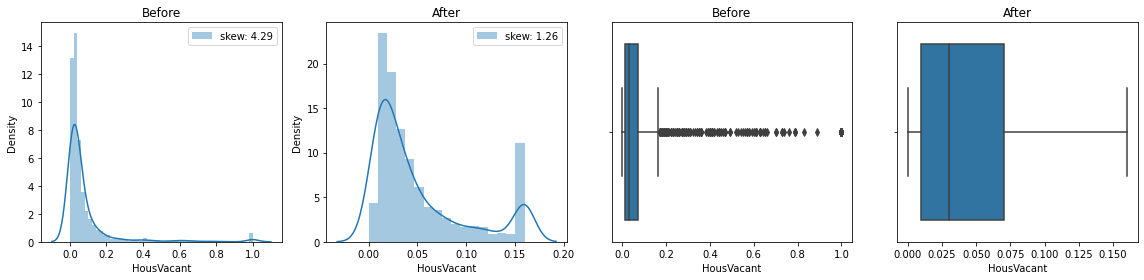

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

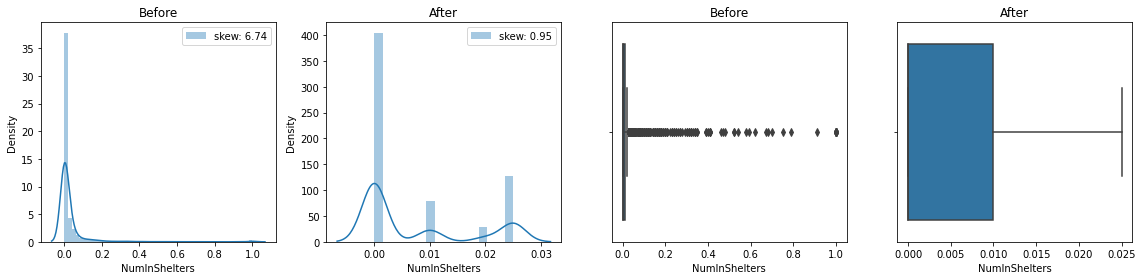

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretati

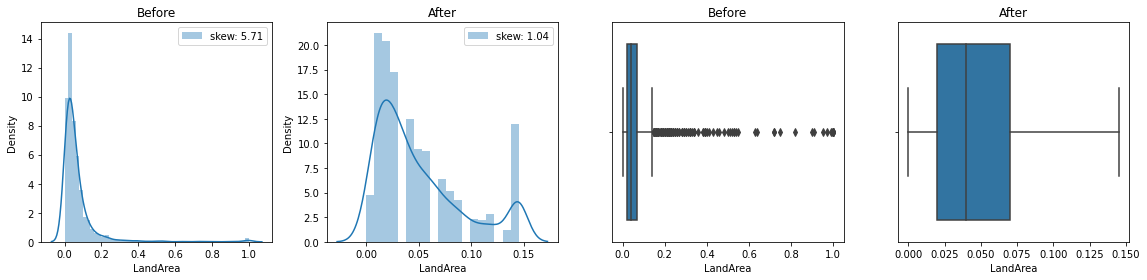

In [ ]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(com[col], label="skew: " + str(np.round(com[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(com[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [ ]:
df_cap.shape

(1994, 101)

#### Define the target variable and the explicative data

In [ ]:
#X= com.iloc[:, 0:100].values
#Y= com.iloc[:, 100].values
Y=com['ViolentCrimesPerPop']
X=com.drop(['ViolentCrimesPerPop'],axis=1)

### Task1: identify the covariates which are associated with the target variable

##### Correlation

<function matplotlib.pyplot.show>

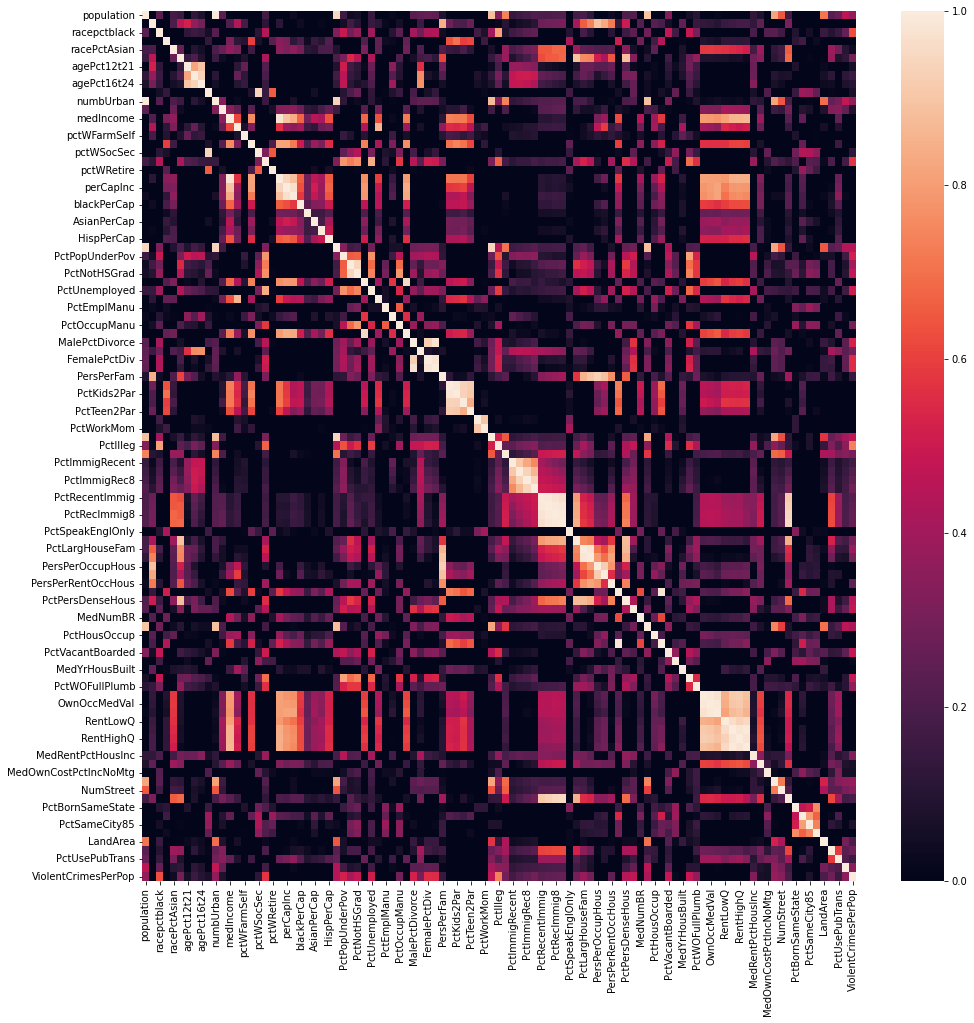

In [ ]:
import seaborn as sns
CorMatrix=com.corr(method= 'pearson')
fig=plt.figure(figsize=(16,16))
sns.heatmap(CorMatrix, vmin=0, vmax=1)
plt.show

<function matplotlib.pyplot.show>

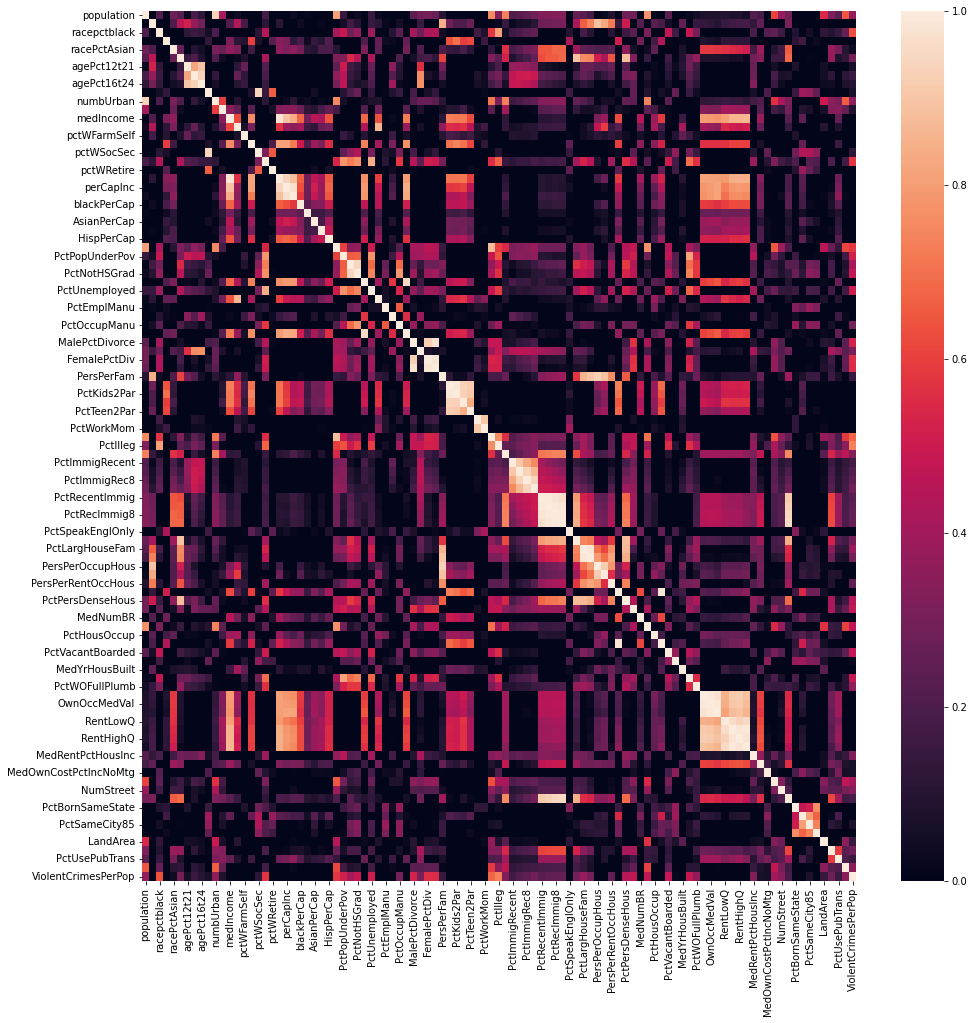

In [ ]:
import seaborn as sns
CorMatrix1=df_cap.corr(method= 'pearson')
fig=plt.figure(figsize=(16,16))
sns.heatmap(CorMatrix1, vmin=0, vmax=1)
plt.show

In [ ]:
for col in features:
  a=Y.corr(com[col])
  b=df_cap[col].corr(Y)
  ab=abs(a-b)
  print(col,ab)


population 0.0075409483980795056
numbUrban 0.0003758115353313385
NumUnderPov 0.1321287624433357
NumIlleg 0.20334312275109512
NumImmig 0.030062185780004025
HousVacant 0.052934413479074405
NumInShelters 0.03303854394612399
LandArea 0.05209909160780285


In [ ]:
print(com.PctUnemployed.corr(Y))
print(com.PctEmploy.corr(Y))

0.5042346420995992
-0.3316428281945392


In [ ]:
com.MalePctDivorce.corr(com.FemalePctDiv)

0.9223946342691777

In [ ]:
CorMatrix

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,0.993112,0.239446,-0.101615,0.004512,-0.130692,-0.150788,-0.120253,0.177172,-0.093911,-0.105370,-0.055656,0.037044,-0.059646,-0.017264,-0.081033,-0.031002,-0.083065,0.947598,0.162004,0.036706,0.057031,-0.003418,0.145247,-0.005217,-0.106284,0.021769,-0.029409,-0.021380,0.232603,0.247567,...,0.181610,0.190308,0.123572,-0.036567,-0.003476,0.031548,-0.247854,0.205913,0.218492,-0.205286,0.896324,-0.089887,-0.253136,0.326142,-0.085401,-0.056666,0.061482,0.108046,-0.012131,0.000689,0.018575,-0.006479,-0.009835,0.004060,-0.024675,0.130430,0.083214,-0.037976,0.821243,0.651797,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.466352,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,-0.047581,-0.015739,0.209431,0.440269,0.182579,-0.155101,-0.451412,0.115204,-0.324700,0.111438,-0.130716,-0.131671,0.042506,-0.007850,-0.055818,0.016719,-0.085088,-0.030139,0.055085,0.172144,0.100286,-0.033412,0.143811,0.113240,0.023287,-0.084040,0.054622,-0.075045,-0.449461,0.154911,...,0.416072,0.661575,0.741099,0.892978,0.825000,0.725371,0.138005,0.501638,-0.331717,0.221582,-0.175594,0.230174,0.192774,0.051490,-0.037004,0.253885,-0.007921,0.143368,0.134584,0.123739,0.100420,0.150031,0.167956,0.179718,0.181260,0.130425,0.247992,-0.096443,-0.082164,-0.043011,0.311107,-0.049253,-0.057842,-0.103109,-0.003277,-0.015078,-0.004072,-0.051506,-0.094368,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,0.223469,-0.001269,-0.360678,-0.227563,-0.152885,-0.492914,0.111816,0.444933,-0.072391,-0.359963,-0.286882,-0.102517,-0.254697,-0.048519,-0.115584,-0.105901,-0.151800,0.322461,0.490241,0.287046,0.367356,-0.179972,0.388319,-0.273293,-0.017564,0.098526,0.234502,-0.195774,0.403862,0.284991,...,-0.046706,0.185606,0.108922,-0.111595,-0.171936,0.108296,-0.376603,0.158357,0.234670,-0.145600,0.279908,-0.252871,-0.339205,0.472906,0.168711,-0.086077,0.485035,0.303009,-0.287745,-0.269741,-0.246149,-0.321254,-0.304787,-0.293334,-0.279273,0.192188,-0.070004,0.220838,0.229323,0.167133,-0.098114,0.093494,-0.045646,0.056358,-0.002894,0.149758,0.095053,0.147023,0.260793,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,-0.295237,-0.052273,0.308686,0.117234,0.096982,0.596067,0.067204,-0.589538,0.228338,0.343336,0.315083,0.123322,0.187614,0.039826,0.145204,0.104872,0.213038,-0.376409,-0.542139,-0.470762,-0.485574,0.218160,-0.517483,0.255373,0.038210,0.027497,-0.263275,0.260435,-0.341788,-0.378077,...,-0.454456,-0.591879,-0.522774,-0.214500,-0.116702,-0.470569,0.508516,-0.639795,-0.368909,0.279932,-0.280925,0.178123,0.440891,-0.450965,0.007263,0.017374,-0.481075,-0.419140,0.091179,0.072974,0.061

##### Multiple testing

In [ ]:
import statsmodels.api as sm
lm = sm.OLS(Y,X)
model= lm.fit()
p_values = model.summary2().tables[1]['P>|t|']

In [ ]:
len(p_values[p_values<=0.05])
# we only have 26 significant feature
# the correlation between features may lead to FP & FN 

26

In [ ]:
import statsmodels.stats.multitest as st
sidak_pvals=st.multipletests(p_values, alpha=0.05, method='sidak',is_sorted=False, returnsorted=False)[1]

In [ ]:
sidak_pvals[sidak_pvals<=0.05]

array([0.00039201, 0.02657337, 0.019801  , 0.04401302, 0.01157636,
       0.02095246])

In [ ]:
bonferroni_pvals=st.multipletests(p_values, alpha=0.05, method='bonferroni',is_sorted=False, returnsorted=False)[1]

In [ ]:
bonferroni_pvals[bonferroni_pvals<=0.05]

array([0.00039209, 0.0269292 , 0.01999767, 0.04500085, 0.01164321,
       0.02117283])

clc/ in both methods we have only 6 features that are significant.

In [ ]:
fdr_pvals=sidak_pvals=st.multipletests(p_values, alpha=0.05, method='fdr_bh',is_sorted=False, returnsorted=False)[1]

In [ ]:
fdr_pvals[fdr_pvals<=0.05]

array([0.00039209, 0.02739339, 0.00538584, 0.00529321, 0.00750014,
       0.02805386, 0.04924952, 0.04924952, 0.04924952, 0.00529321,
       0.03725361, 0.0079418 , 0.00529321])

the fdr procedure provide less stringent control of type error I compared to FWER procedures.

####For the prédictions of errors we use the function below:

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def evaluation(y,y_pred):
  mse=mean_squared_error(y,y_pred)
  rmse=np.sqrt(mse)
  mae=mean_absolute_error(y,y_pred)
  score=r2_score(y,y_pred)
  return (mse,rmse,mae,score)

In [ ]:
# train split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

### Lasso, Ridge and elastic net regression

#### 1- Linear regression

In [ ]:
Y=df_cap['ViolentCrimesPerPop']
X=df_cap.drop(['ViolentCrimesPerPop'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

from sklearn.linear_model import LinearRegression
LM=LinearRegression()
LM.fit(X_train,Y_train)
Y_LM=LM.predict(X_test)
#mse,rmse,mae,score=evaluation(Y_test,Y_LM)

In [ ]:
print("LM r2 score:",score,"\n","LM mae:",mae,"\n","LM mse",mse,"\n","LM rmse:",rmse)

LM r2 score: 0.6557021705342456 
 LM mae: 0.09751327527623033 
 LM mse 0.018893395001832375 
 LM rmse: 0.13745324660346286


In [ ]:
from sklearn.linear_model import LinearRegression
LM=LinearRegression()
LM.fit(X_train,Y_train)
Y_LM=LM.predict(X_test)
mse,rmse,mae,score=evaluation(Y_test,Y_LM)

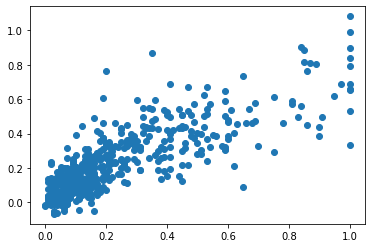

In [ ]:
plt.scatter(Y_test,Y_LM)

#### 2- Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
alphas=np.linspace(0.001,4,100)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

Text(0, 0.5, 'weights')

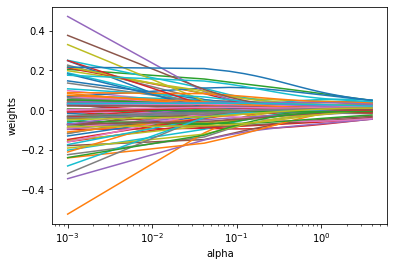

In [ ]:
ridge = Ridge(max_iter=10000, normalize=True)
coefs_r = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs_r.append(ridge.coef_)

# plot lasso tuning parametrs alpha
ax = plt.gca()
ax.plot(alphas, coefs_r)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
ridgecv = RidgeCV(alphas=alphas, normalize=True)
ridgecv.fit(X_train, Y_train)
print("Alpha=", ridgecv.alpha_)

Alpha= 0.04139393939393939


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
ridge = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge(alpha=0.04139393939393939, normalize=True)

In [ ]:
alpha=ridgecv.alpha_
alpha

0.04139393939393939

In [ ]:
Y_ridge=ridge.predict(X_test)
mse,rmse,mae,score=evaluation(Y_test,Y_ridge)
print(" Ridge r2 score:",score,"\n","Ridge mae:",mae,"\n","Ridge mse",mse,"\n","Ridge rmse:",rmse)

In [ ]:
print("best model coefficients:")
pd.Series(ridge.coef_, index=X.columns)

best model coefficients:


population            -0.490871
householdsize          0.046544
racepctblack           0.125915
racePctWhite          -0.064738
racePctAsian          -0.026713
                         ...   
PctSameState85         0.022054
LandArea               0.198476
PopDens                0.009416
PctUsePubTrans        -0.016972
LemasPctOfficDrugUn    0.040185
Length: 100, dtype: float64

#### Lasso regression

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

In [ ]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)

np.shape(coefs)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

(100, 100)

Text(0, 0.5, 'weights')

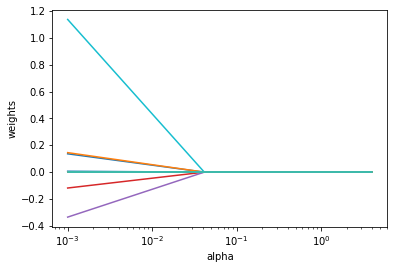

In [ ]:
# plot lasso tuning parametrs alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, Y_train)

Alpha= 1.7921059667111848e-05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Lasso(alpha=1.7921059667111848e-05, max_iter=10000, normalize=True)

In [ ]:
pd.Series(lasso.coef_, index=X.columns)

population            -0.532113
householdsize          0.005447
racepctblack           0.144046
racePctWhite          -0.016946
racePctAsian          -0.005085
                         ...   
PctSameState85         0.019934
LandArea               0.120526
PopDens               -0.000000
PctUsePubTrans        -0.003749
LemasPctOfficDrugUn    0.033851
Length: 100, dtype: float64

In [ ]:
Y_lasso=lasso.predict(X_test)
mse,rmse,mae,score=evaluation(Y_test,Y_lasso)
print(" lasso r2 score:",score,"\n","lasso mae:",mae,"\n","lasso mse",mse,"\n","lasso rmse:",rmse)

 lasso r2 score: 0.6674372560545736 
 lasso mae: 0.09491539649191794 
 lasso mse 0.01824943042482683 
 lasso rmse: 0.1350904527523201


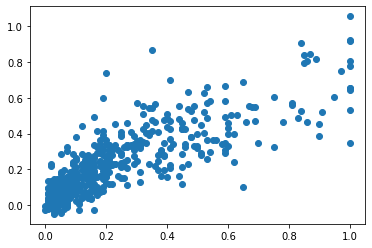

In [ ]:
plt.scatter(Y_test,Y_lasso);

In [ ]:
models = []
models.append(('ridge', ridge))
models.append(('lasso', lasso))

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

results = []
rmse_cv=[]
names = []

for name, model in models:
  cv_r2 = cross_val_score(model, X_train, Y_train, cv = 10, scoring = make_scorer(r2_score))
  results.append([cv_r2.mean(),cv_r2.std()])
  mse_cv= cross_val_score(model, X_train, Y_train, cv = 10, scoring = make_scorer(mean_squared_error))
  rmse_cv.append(np.sqrt(mse_cv).mean())
  names.append(name)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

ridge :
0.6471778095895939 +/- 0.07644197826142769
lasso :
0.6475858947083164 +/- 0.07553621322120183


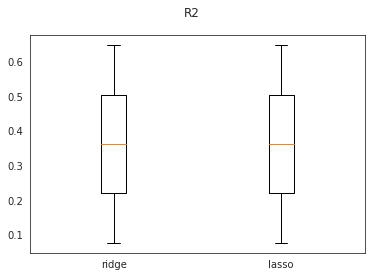

In [ ]:
for i in range(len(names)):
  print(names[i],":")
  print(results[i][0],"+/-",results[i][1])
 # if u want so... 
fig = plt.figure()
fig.suptitle('R2')
ax = fig.add_subplot(111)
plt.boxplot([results[0],results[1]])
ax.set_xticklabels(names)
plt.show()

In [ ]:
DF = pd.DataFrame({
    'Model'       : ['ridge', 'lasso'],
    'RMSE_mean'    : [rmse_cv[0],rmse_cv[1]],
    'r2_mean'      : [results[0][0], results[1][0]],
    'r2_std'      : [results[0][1], results[1][1]],
    }, columns = ['Model', 'RMSE_mean', 'r2_mean', 'r2_std'])

DF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,r2_mean,r2_std
1,lasso,0.138047,0.647586,0.075536
0,ridge,0.138104,0.647178,0.076442


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


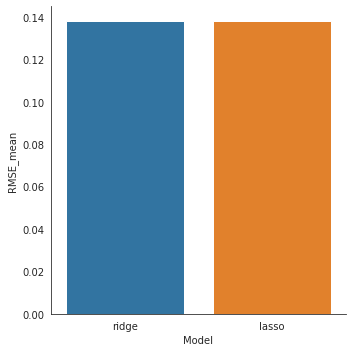

In [ ]:
import seaborn as sns
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= DF, kind='bar', legend='True')

#### Elsatic net

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.datasets import make_regression

In [ ]:
Y=df_cap['ViolentCrimesPerPop']
X=df_cap.drop(['ViolentCrimesPerPop'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,Y_train)
enet_cv_model.alpha_

0.00019551767865340466

In [ ]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,Y_train)
Y_pred = enet_tuned.predict(X_test)
np.sqrt(mean_squared_error(Y_test,Y_pred))
mse,rmse,mae,score=evaluation(Y_test,Y_pred)
print(" lasso r2 score:",score,"\n","lasso mae:",mae,"\n","lasso mse",mse,"\n","lasso rmse:",rmse)

 lasso r2 score: 0.6468195424224014 
 lasso mae: 0.09765553073931006 
 lasso mse 0.018430332142791037 
 lasso rmse: 0.1357583593845736


### Task3: dimension reduction with pca 

In [ ]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
pca_components = pd.DataFrame()
pca_components['Explained Variance Ratio'] = pca.explained_variance_ratio_
pca_components['Cumulative Variance Ratio'] = np.cumsum(pca.explained_variance_ratio_)
pca_components

,Explained Variance Ratio,Cumulative Variance Ratio
0,0.255021,0.255021
1,0.168878,0.423900
2,0.091943,0.515842
3,0.074278,0.590120
4,0.057040,0.647161
5,0.042253,0.689414
6,0.032287,0.721701
7,0.029812,0.751513
8,0.020226,0.771739
9,0.015920,0.787659


In [ ]:
pca = PCA(n_components = 14)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

##### Here we choose 14 components (they represent abour 84% of the variance. the other components are less interessting (less than 1% variance explained)

In [ ]:
pca_components = pd.DataFrame()
pca_components['Explained Variance Ratio'] = pca.explained_variance_ratio_
pca_components['Cumulative Variance Ratio'] = np.cumsum(pca.explained_variance_ratio_)
pca_components

,Explained Variance Ratio,Cumulative Variance Ratio
0,0.255021,0.255021
1,0.168878,0.423900
2,0.091943,0.515842
3,0.074278,0.590120
4,0.057040,0.647161
5,0.042253,0.689414
6,0.032287,0.721701
7,0.029812,0.751513
8,0.020226,0.771739
9,0.015920,0.787658


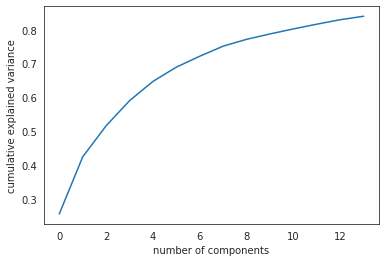

None

In [ ]:
sns.set_style("white")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
#plt.axvline(linewidth=2, color='r', linestyle = '--', x=, ymin=0, ymax=1)
display(plt.show())

In [ ]:
X_train_pca.shape

(1495, 14)

In [ ]:
# we want to see the weights of variables for each pca component 
pca_dims = []
for comp in range(0,len(pca_components)):
    pca_dims.append('component {}'.format(comp))

In [ ]:
pca_weights = pd.DataFrame(pca.components_, columns=X.columns, index=pca_dims)
pca_weights.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,...,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
component 0,0.051816,-0.016921,0.109959,-0.115062,-0.048548,0.059520,0.061281,0.072501,0.063475,0.039093,0.044962,-0.054019,-0.181823,-0.114556,-0.001265,-0.172924,0.069419,0.162147,-0.003411,-0.182452,-0.168612,-0.147078,-0.126396,-0.056183,-0.089000,-0.079244,-0.124845,0.080404,0.172403,0.143411,0.160428,-0.136925,0.156441,-0.127455,0.020135,-0.019560,0.135809,-0.147604,0.127429,0.061327,...,-0.028114,0.051810,0.075680,0.056743,-0.031954,-0.050626,0.053528,-0.139916,0.092229,0.126971,-0.100470,0.062838,-0.081876,-0.128271,0.107959,0.043024,-0.040671,0.162230,0.106536,-0.137981,-0.135376,-0.132512,-0.145905,-0.149860,-0.148929,-0.150968,0.060862,-0.052645,0.017655,0.053939,0.044618,-0.013058,0.040866,-0.041949,0.019230,0.019466,0.026397,0.031135,-0.024655,0.047787
component 1,0.092664,0.112646,0.015049,-0.121745,0.166709,0.162512,0.037642,0.086326,0.056165,-0.111880,0.097052,0.078978,0.059963,0.088093,-0.022077,-0.025540,-0.118242,0.033000,-0.102435,0.052719,0.041339,0.060792,0.052754,0.021580,0.005902,0.027606,0.015298,0.082970,0.012002,0.030037,0.006018,0.052165,0.025419,0.050404,-0.039727,-0.011441,-0.039339,0.033270,-0.017961,0.115739,...,-0.190857,0.188646,0.155703,0.148177,0.109032,0.109450,0.118553,-0.089201,0.176277,0.066131,-0.064278,0.061737,0.026913,-0.082970,0.017514,-0.094279,0.022509,-0.026760,0.038124,0.126707,0.129020,0.127213,0.124653,0.123662,0.125188,0.115272,0.085863,0.146084,-0.019190,0.081954,0.084959,0.211374,-0.129471,-0.074491,-0.058255,-0.073444,0.029705,0.140384,0.110112,0.066627
component 2,0.153900,-0.219463,0.074077,0.000608,0.032986,-0.143311,-0.045756,0.025590,0.050500,0.064169,0.155221,0.068294,-0.007462,-0.032743,-0.064357,0.075246,0.008013,-0.060517,0.022709,0.029702,0.090194,0.112863,0.011795,0.020212,0.009020,0.024207,0.049917,0.140886,-0.002307,-0.129400,-0.118973,0.134995,-0.073799,0.014425,-0.104666,0.129717,-0.129822,0.124507,0.109516,0.107399,...,0.112320,-0.116709,-0.171932,-0.204840,-0.251579,-0.217243,-0.204823,-0.101973,-0.125033,0.107215,-0.092106,0.173237,-0.067772,-0.120903,0.008502,-0.057454,-0.036850,-0.038392,-0.063803,0.031317,0.039391,0.053408,0.029083,0.028219,0.030451,0.020327,0.029393,-0.013239,-0.001782,0.149619,0.116854,-0.045859,-0.084837,-0.099400,-0.103691,-0.125825,0.106894,0.034811,0.089150,0.103954
component 3,-0.092188,0.102484,-0.036290,0.038716,-0.008898,-0.022638,0.238097,0.248176,0.234254,-0.204475,-0.098929,-0.082558,-0.046744,0.155644,0.131505,-0.025006,-0.194346,-0.073608,-0.165191,-0.038020,-0.078219,-0.089805,-0.061728,-0.027775,-0.094156,-0.026706,-0.077524,-0.091260,0.050239,-0.072127,-0.098713,0.071879,-0.065455,0.092425,-0.064489,0.074467,-0.050291,0.029827,-0.048383,0.083000,...,0.072884,-0.062293,-0.032066,-0.021921,0.023249,0.030752,0.035505,-0.070562,-0.009414,-0.017357,-0.001374,-0.093844,0.013637,-0.072897,-0.090134,-0.088078,0.181170,0.017739,-0.047365,-0.085184,-0.085238,-0.08478

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
def evaluationCV(model,XX,YY):
  results = []
  
  for name, model in models:
    cv_r2 = cross_val_score(model, XX, YY, cv = 10, scoring = make_scorer(r2_score))
    mse_cv= cross_val_score(model, XX, YY, cv = 10, scoring = make_scorer(mean_squared_error))
    results.append([name,cv_r2.mean(),cv_r2.std(),np.sqrt(mse_cv).mean()])
    #rmse_cv.append(np.sqrt(mse_cv).mean())
  return (results)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR (100 Trees)', RandomForestRegressor(n_estimators=100)))

In [ ]:
results=evaluationCV(models,X_train_pca,Y_train)

In [ ]:
DF = pd.DataFrame({
    'Model'       : ['LR', 'DTR', 'DFR'],
    'RMSE_mean'    : [results[0][3], results[1][3], results[2][3]],
    'r2_mean'      : [results[0][1], results[1][1], results[2][1]],
    'r2_std'      : [results[0][2], results[1][2], results[2][2]],
    }, columns = ['Model', 'RMSE_mean', 'r2_mean', 'r2_std'])

DF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,r2_mean,r2_std
0,LR,0.142113,0.636381,0.062429
2,DFR,0.145502,0.614932,0.031417
1,DTR,0.207158,0.220316,0.070828


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


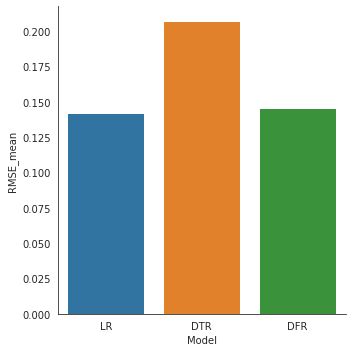

In [ ]:
import seaborn as sns
sns.factorplot(x= 'Model', y= 'RMSE_mean', data= DF, kind='bar', legend='True')

In [ ]:
LR.fit(X_train_pca, Y_train)

LinearRegression()

In [ ]:
Y_LR=LR.predict(X_test_pca)
mse,rmse,mae,score=evaluation(Y_test,Y_LR)
print(" LR r2 score:",score,"\n","LR mae:",mae,"\n","LR mse",mse,"\n","LR rmse:",rmse)

 LR r2 score: 0.6337210637261262 
 LR mae: 0.09098470201392415 
 LR mse 0.017629061203596894 
 LR rmse: 0.1327744749701421


#### dimentional reduction with PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def pls_cv_opt(X, Y, n):
    pls = PLSRegression(n_components=n)
    Y_cv = cross_val_predict(pls, X, Y, cv=10)
    r2 = r2_score(Y, Y_cv)
    rmse = np.sqrt(mean_squared_error(Y, Y_cv))
    return (Y_cv,r2, rmse)

In [ ]:
R2 = []
RMSE = []
interval= np.arange(1, 40)
for n in interval:
    y_cv, r2, rmse = pls_cv_opt(X,Y,n)
    R2.append(r2)
    RMSE.append(rmse)

In [ ]:
i=np.where(RMSE==min(RMSE))
i

(array([21]),)

Text(0, 0.5, 'RMSE')

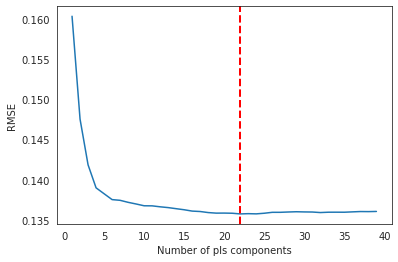

In [ ]:
plt.plot(interval,RMSE)
plt.xlabel('Number of pls components')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=22, ymin=0, ymax=1)
plt.ylabel('RMSE')

In [ ]:
M=np.where(R2==max(R2))
M

(array([21]),)

Text(0, 0.5, 'R2')

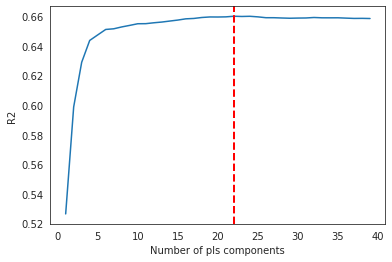

In [ ]:
plt.plot(interval,R2)
plt.xlabel('Number of pls components')
plt.axvline(linewidth=2, color='r', linestyle = '--', x=22, ymin=0, ymax=1)
plt.ylabel('R2')

In [ ]:
pls= PLSRegression(n_components=22)
pls.fit(X_train, Y_train)
Y_pls= pls.predict(X_test)

In [ ]:
mse,rmse,mae,score=evaluation(Y_test,Y_pls)
print(" LR r2 score:",score,"\n","LR mae:",mae,"\n","LR mse",mse,"\n","LR rmse:",rmse)

 LR r2 score: 0.6503712078325026 
 LR mae: 0.09147179545956079 
 LR mse 0.016827687222100617 
 LR rmse: 0.1297215757771259


### Recursive feature selection with cross validation 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

## create ranking among all features by selecting only one
rfe = RFE(LinearRegression(), n_features_to_select=20)
rfe.fit(X_train, Y_train)
rfe.ranking_

array([ 1, 11,  6,  1,  5, 13,  4,  3, 19, 20, 14,  1, 15,  1,  1, 10,  1,
       17, 16,  1,  1,  1,  1,  9,  1, 12,  1,  1,  1,  2, 21,  1,  1,  1,
        1,  8,  7, 18, 22,  1,  1])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3)
rfe_cv = RFECV(LinearRegression(), step=1, cv=cv, scoring = 'r2')
rfe_cv.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


RFECV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=None),
      estimator=LinearRegression(), scoring='r2')

In [ ]:
print("Optimal number of features : %d" % rfe_cv.n_features_)

Optimal number of features : 41


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


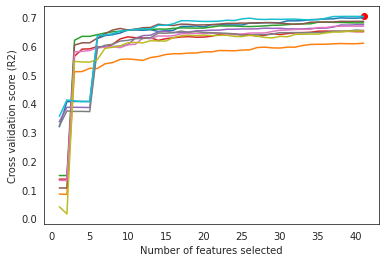

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R2)")
plt.plot(range(1, len(rfe_cv.grid_scores_) + 1), rfe_cv.grid_scores_)
plt.scatter(rfe_cv.n_features_,np.max(rfe_cv.grid_scores_), c = 'red')
plt.show()

In [ ]:
selected_features = rfe_cv.get_support(1)
X_train=X_train[X_train.columns[selected_features]]
X_test=X_test[X_test.columns[selected_features]]

In [ ]:
X=X[X.columns[selected_features]]
X.head()

,population,racepctblack,agePct12t29,numbUrban,medIncome,pctWWage,pctWInvInc,medFamInc,NumUnderPov,PctPopUnderPov,PctEmploy,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PctFam2Par,PctKids2Par,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctNotSpeakEnglWell,PctLargHouseFam,PersPerOccupHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,HousVacant,PctHousOwnOcc,OwnOccLowQuart,OwnOccMedVal,RentLowQ,MedRent,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn
0,0.19,0.02,0.47,0.20,0.37,0.72,0.60,0.39,0.08,0.19,0.68,0.68,0.40,0.75,0.75,0.55,0.59,0.76,0.04,0.14,0.03,0.07,0.08,0.08,0.06,0.14,0.33,0.28,0.55,0.09,0.51,0.21,0.52,0.22,0.19,0.36,0.34,0.25,0.04,0.0,0.12
1,0.00,0.12,0.59,0.02,0.31,0.72,0.45,0.29,0.01,0.24,0.73,1.00,0.63,0.91,1.00,0.43,0.47,0.53,0.00,0.24,0.01,0.27,0.25,0.23,0.10,0.16,0.17,0.17,0.26,0.20,0.82,0.02,0.24,0.21,0.20,0.42,0.37,0.18,0.00,0.0,0.21
2,0.00,0.49,0.47,0.00,0.30,0.58,0.39,0.28,0.01,0.27,0.58,0.63,0.41,0.71,0.70,0.42,0.44,0.67,0.01,0.46,0.00,0.02,0.04,0.05,0.04,0.20,0.46,0.43,0.42,0.15,0.51,0.01,0.41,0.18,0.17,0.27,0.31,0.28,0.00,0.0,0.14
3,0.04,1.00,0.50,0.06,0.58,0.89,0.43,0.51,0.01,0.10,0.71,0.34,0.45,0.49,0.44,0.65,0.54,0.86,0.03,0.33,0.02,0.08,0.11,0.11,0.08,0.56,0.85,1.00,0.94,0.12,0.01,0.01,0.96,0.24,0.21,0.75,0.89,0.47,0.00,0.0,0.19
4,0.01,0.02,0.38,0.02,0.50,0.72,0.68,0.46,0.00,0.06,0.65,0.22,0.27,0.20,0.21,0.91,0.91,0.60,0.00,0.06,0.00,0.02,0.04,0.05,0.05,0.16,0.59,0.37,0.89,0.02,0.19,0.01,0.87,0.31,0.31,0.40,0.38,0.21,0.00,0.0,0.11


In [ ]:
LR=LinearRegression()
LR.fit(X_train, Y_train)
Y_LR = LR.predict(X_test)
mse,rmse,mae,score=evaluation(Y_test,Y_LR)
print(" LR r2 score:",score,"\n","LR mae:",mae,"\n","LR mse",mse,"\n","LR rmse:",rmse)

 LR r2 score: 0.6510311664268101 
 LR mae: 0.09871881848118741 
 LR mse 0.020534787570175385 
 LR rmse: 0.1432996426030972
